# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-10-03 09:00:03.926362


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/2/20


,10/2/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7332200,208695,2.85
Brazil,4847092,144680,2.98
India,6473544,100842,1.56
Mexico,753090,78492,10.42
United Kingdom,469769,42358,9.02
Italy,319908,35941,11.23
Peru,818297,32535,3.98


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 10/2/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
44112,US,7233042,2020-09-30,206932.0,946.0,41405.0,41832.571429
44111,US,7191637,2020-09-29,205986.0,914.0,42100.0,41408.000000
44110,US,7149537,2020-09-28,205072.0,316.0,33312.0,40960.142857
44109,US,7116225,2020-09-27,204756.0,266.0,36422.0,43696.142857
44108,US,7079803,2020-09-26,204490.0,740.0,44872.0,43666.428571
44107,US,7034931,2020-09-25,203750.0,952.0,50585.0,43549.000000
44106,US,6984346,2020-09-24,202798.0,914.0,44132.0,43282.000000


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 10/2/20


,10/2/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,461629,33199.0,7.19
Texas,782306,16224.0,2.07
New Jersey,206629,16131.0,7.81
California,826013,16054.0,1.94
Florida,711804,14554.0,2.04
Massachusetts,133631,9490.0,7.10
Illinois,300340,8992.0,2.99


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 10/2/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1527,California,819115,2020-09-30,15885.0,103.0,3461.0,3239.857143
1526,California,815654,2020-09-29,15782.0,149.0,2943.0,3227.000000
1525,California,812711,2020-09-28,15633.0,27.0,2821.0,3230.714286
1524,California,809890,2020-09-27,15606.0,23.0,2439.0,3388.857143
1523,California,807451,2020-09-26,15583.0,67.0,3791.0,3448.285714
1522,California,803660,2020-09-25,15516.0,123.0,4144.0,3452.714286
1521,California,799516,2020-09-24,15393.0,102.0,3080.0,3497.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 10/2/20


,10/2/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,272653,6626.0,2.43
Orange,54118,1281.0,2.37
Riverside,59934,1231.0,2.05
San Bernardino,55671,962.0,1.73
San Diego,47791,794.0,1.66
San Joaquin,20485,470.0,2.29
Sacramento,22755,426.0,1.87


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 10/2/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4842,Los Angeles,270299,2020-09-30,6576.0,25.0,1015.0,995.142857
4841,Los Angeles,269284,2020-09-29,6551.0,36.0,829.0,1021.571429
4840,Los Angeles,268455,2020-09-28,6515.0,1.0,654.0,1001.285714
4839,Los Angeles,267801,2020-09-27,6514.0,10.0,813.0,1000.571429
4838,Los Angeles,266988,2020-09-26,6504.0,16.0,1213.0,1024.428571
4837,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4836,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4835,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571
4834,Los Angeles,262133,2020-09-22,6401.0,35.0,687.0,1012.000000
4833,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000



7 day new US cases as of 10/2/20


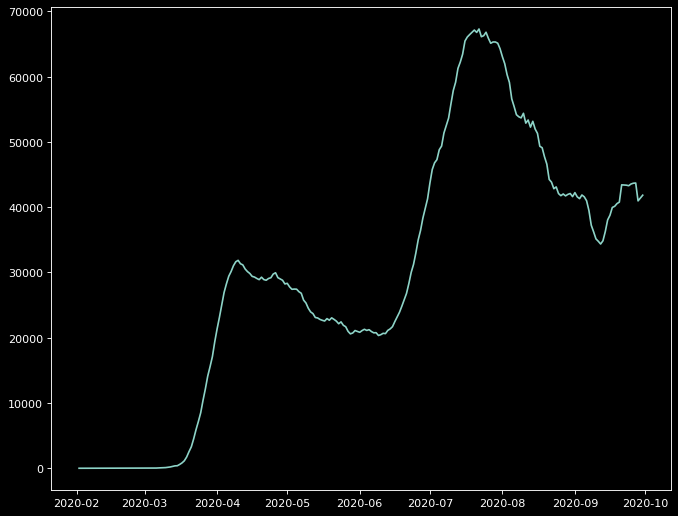

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 10/2/20


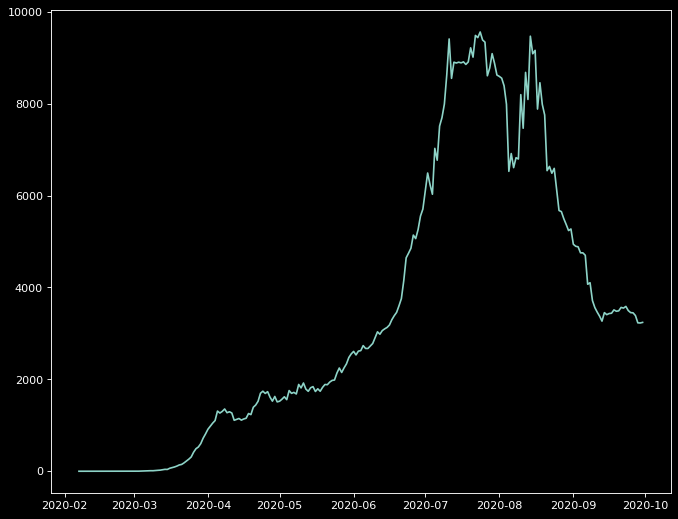

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 10/2/20


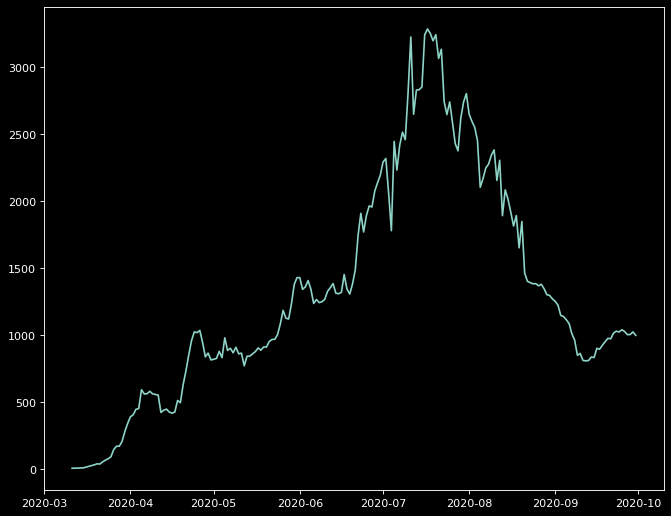

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()